In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Loading Data
df = pd.read_csv('/Users/Kevin/Files/Thinkful/Data Files/plane_crashes_data.csv')
df.head(n=4)

,month,hour,year,location,operator,route,type,aboard,fatalities,summary
0,1,12,1950,"Near Vacas, Bolivia",Military - Bolivian Air Force,Valle grande - Cochabamba,Douglas C-47,32,32,Crashed while en route in the Andes mountains ...
1,3,20,1950,"Minneapolis, Minnesota",Northwest Orient Airlines,Rochester Minn. - Minneapolis,Martin 202,13,13,"Crashed into a flag pole, well marked by red n..."
2,3,14,1950,"Llandow Airport, Cardiff, Wales",Fairflight Ltd.,Llandow - Dublin,Avro 689 Tudor 5,83,80,During the approach to Runway 28 at Llandow Ai...
3,4,23,1950,"Near Atsugi, Japan",Military - U.S. Air Force,Philippines - Japan,Douglas C-54D,35,35,Flew off its prescribed course and crashed int...


In [49]:
#Limit the number of years to show less data
year_filter = df['year'] > 1980
df_1 = df.loc[year_filter]

In [105]:
#Finding top 10 type and grouping remaining to other category
df['type'].value_counts()
type_count = df['type'].value_counts()
top_type = type_count.nlargest(10)
print (top_type)

Douglas DC-3                                99
de Havilland Canada DHC-6 Twin Otter 300    43
Douglas DC-6B                               23
Antonov AN-26                               19
Yakovlev YAK-40                             19
Douglas DC-4                                18
Douglas C-47                                16
McDonnell Douglas DC-9-32                   16
Cessna 208B Grand Caravan                   15
Douglas C-47A                               14
Name: type, dtype: int64


In [110]:
#creating additional column with limited type values
conditions = [
    (df['type'] == 'Douglas DC-3'),
    (df['type'] == 'de Havilland Canada DHC-6 Twin Otter 300'),
    (df['type'] == 'Douglas DC-6B'),
    (df['type'] == 'Antonov AN-26'),
    (df['type'] == 'Yakovlev YAK-40'),
    (df['type'] == 'Douglas DC-4'),
    (df['type'] == 'Douglas C-47'),
    (df['type'] == 'McDonnell Douglas DC-9-32'),
    (df['type'] == 'Cessna 208B Grand Caravan'),
    (df['type'] == 'Douglas C-47A')
]

choices = ['Douglas DC-3',                               
    'de Havilland Canada DHC-6 Twin Otter 300',
    'Douglas DC-6B',                             
    'Antonov AN-26',                           
    'Yakovlev YAK-40',                          
    'Douglas DC-4',                            
    'Douglas C-47',                           
    'McDonnell Douglas DC-9-32',            
    'Cessna 208B Grand Caravan',             
    'Douglas C-47A'
]

df['type limited'] = np.select(conditions, choices, default='Other')

# One variable, four different ways

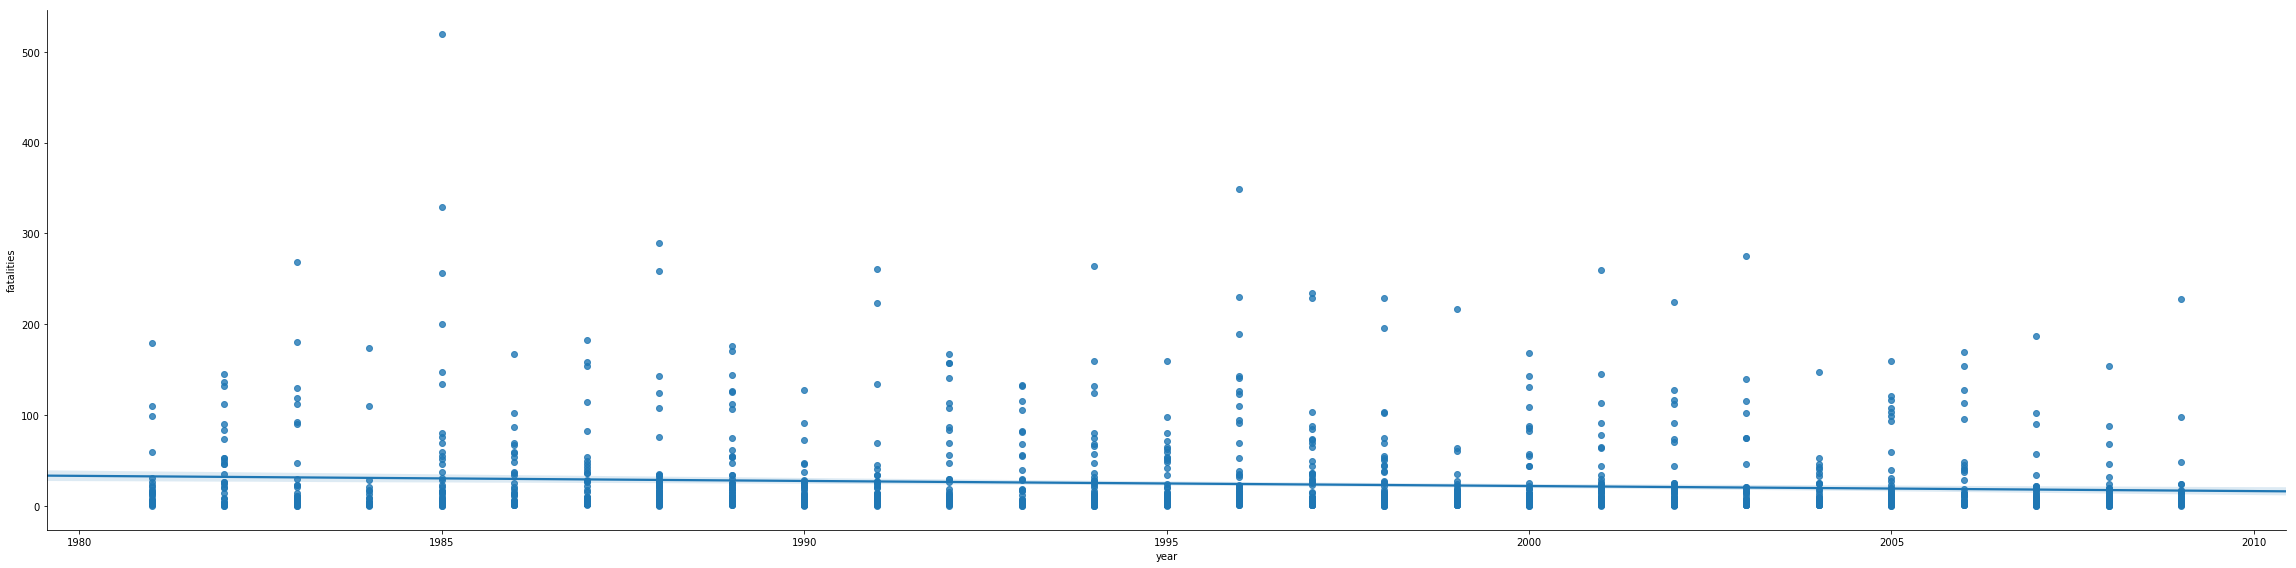

In [148]:
sns.lmplot(x = "year", y = "fatalities", height = 8, aspect = 4, data = df_1)
plt.show()
#pro: Contains linear regression line
#con: hard to see when points overlap

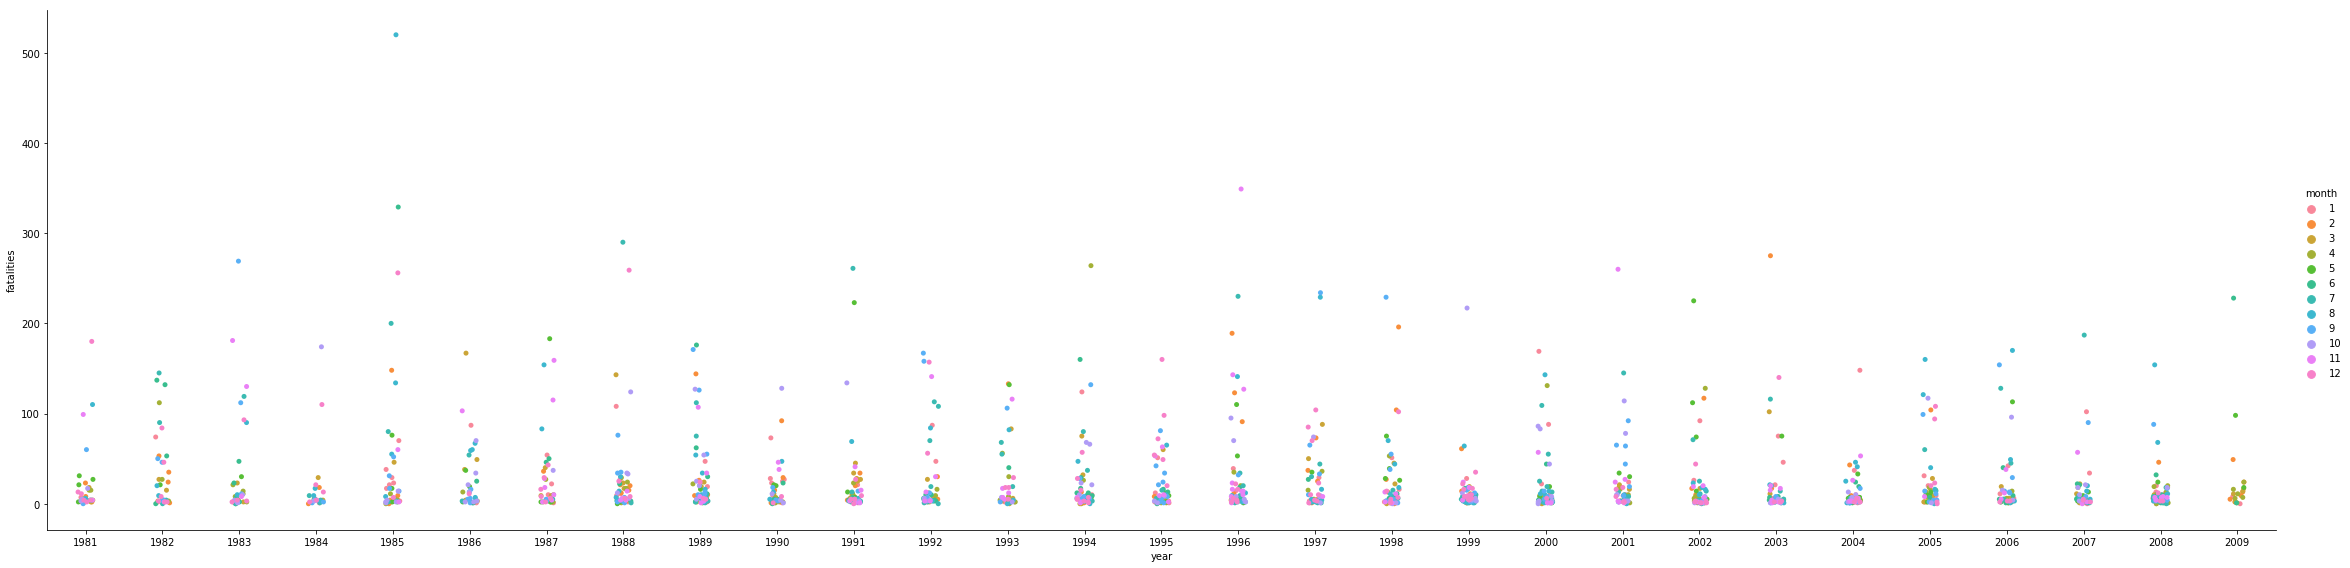

In [150]:
sns.catplot(x = "year", y = "fatalities", hue = "month", height = 8, aspect = 4, data = df_1)
plt.show()
#pro: can split each variable into another category 
#con: colorful default colors makes it hard to see

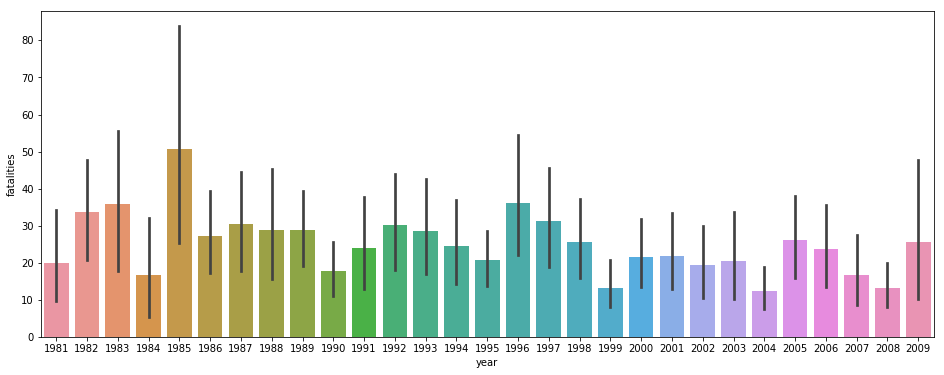

In [58]:
plt.figure(figsize=(16, 6))
sns.barplot(x = "year", y = "fatalities", data = df_1)
plt.show()
#pro: shows variability within each category
#con: minimal other information

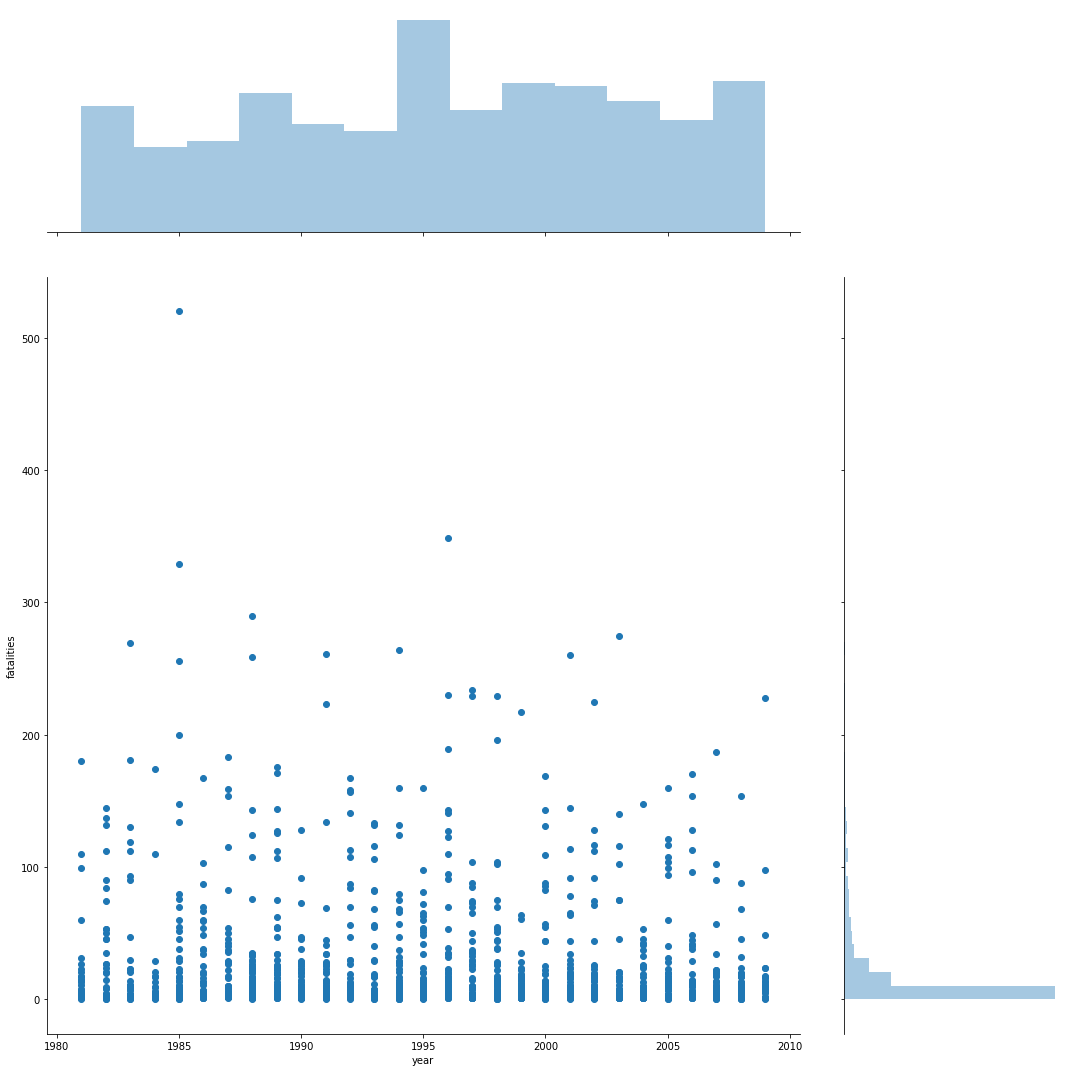

In [86]:
sns.jointplot("year", "fatalities", height = 15, ratio = 3, data = df_1)
plt.show()
#pro: shows frequency along with main information so one can get a better sense of the data and how to interpret
#con: hard to see overlapping points

# Two continuous variables, three different ways

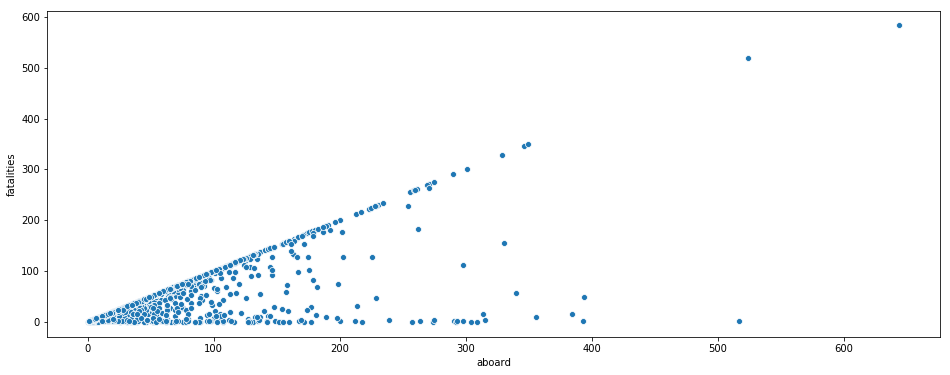

In [87]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x="aboard", y="fatalities", data = df)
plt.show()
#pro: shows relations of two variables every easily
#con: minimal other information

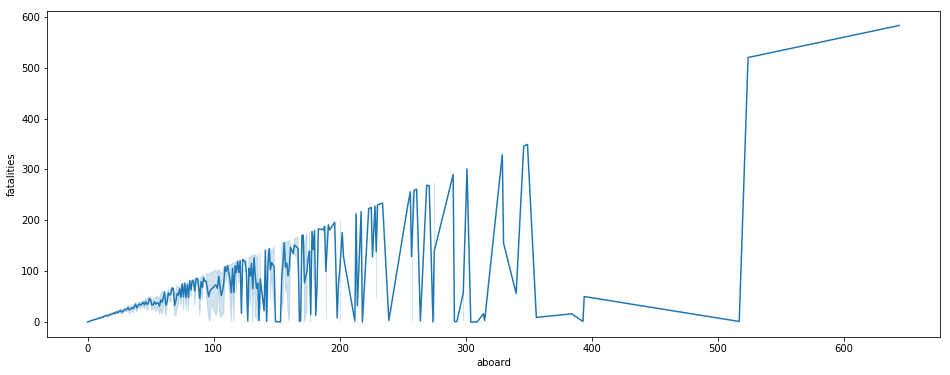

In [88]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="aboard", y="fatalities", data = df)
plt.show()
#pro: shows error bands
#con: hard to see error bands in this instance

<Figure size 1152x432 with 0 Axes>

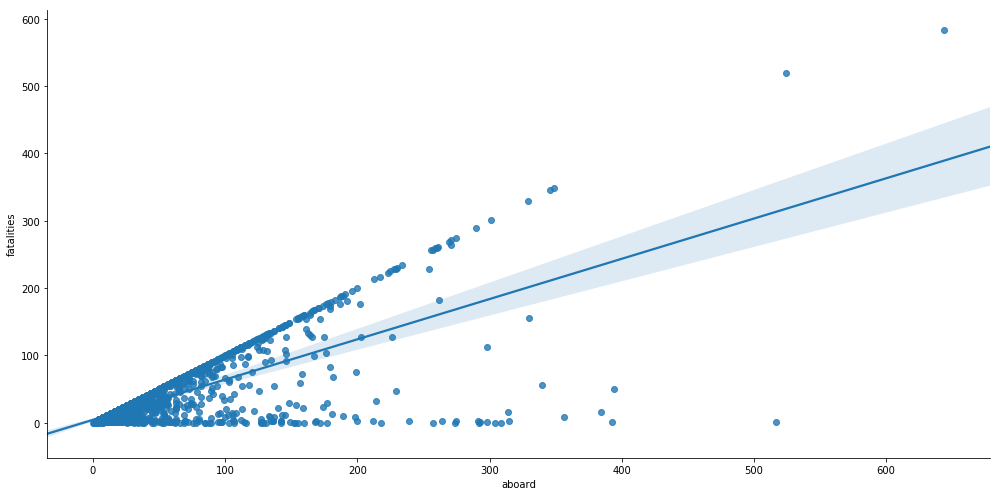

In [97]:
plt.figure(figsize=(16, 6))
sns.lmplot(x="aboard", y="fatalities", height = 7, aspect = 2, data = df)
plt.show()
#pro: shows linear regression line with error buffer
#con: hard to see because of overlapping points

# One continuous variable and one categorical variable, six different ways

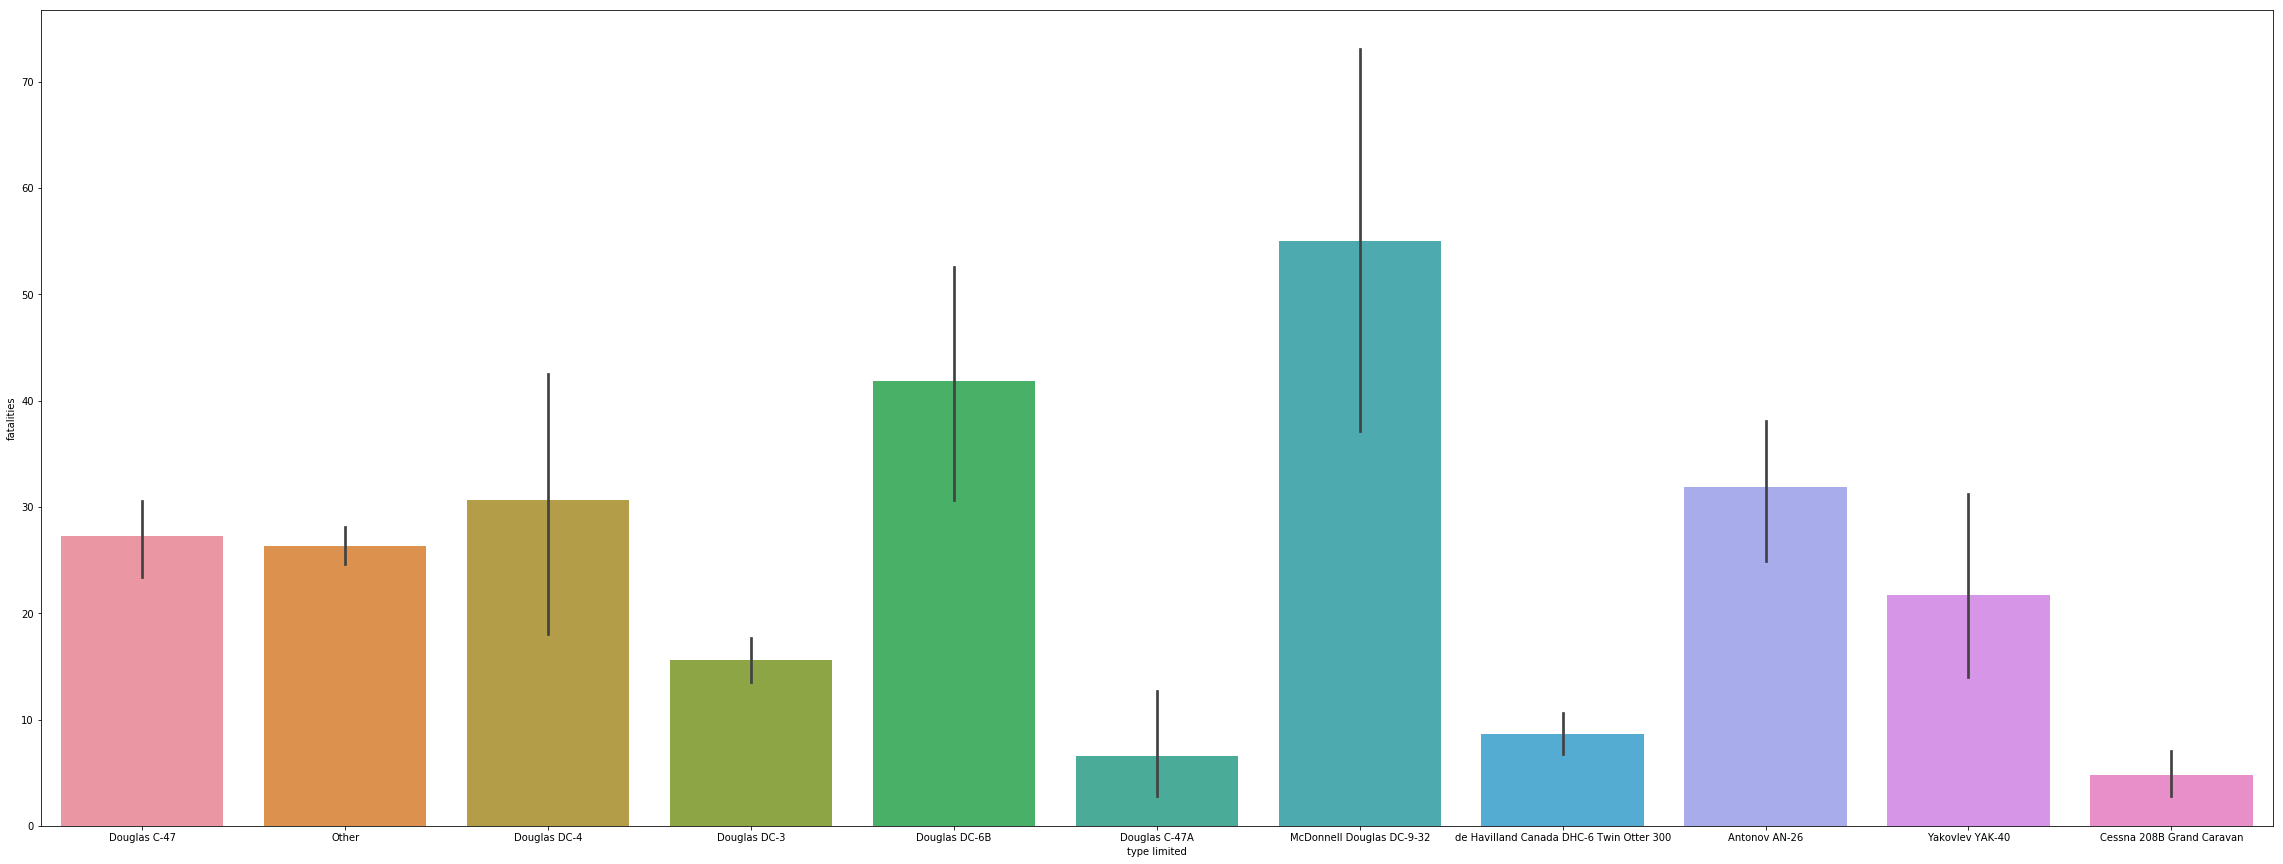

In [116]:
plt.figure(figsize=(40, 15))
sns.barplot(x = "type limited", y = "fatalities", data = df)
plt.show()
#pro: shows variability within each category
#con: minimal other information

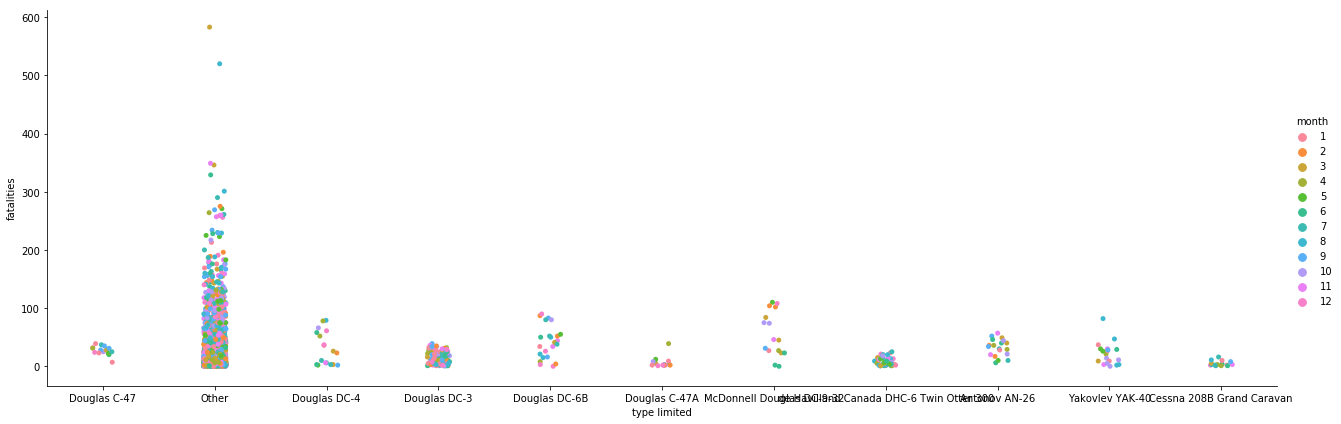

In [154]:
sns.catplot(x = "type limited", y = "fatalities", hue = "month", height = 6, aspect = 3, data = df)
plt.show()
#pro: Shows the various amounts of entries in each bucket
#con: colorful default but colors makes it hard to see

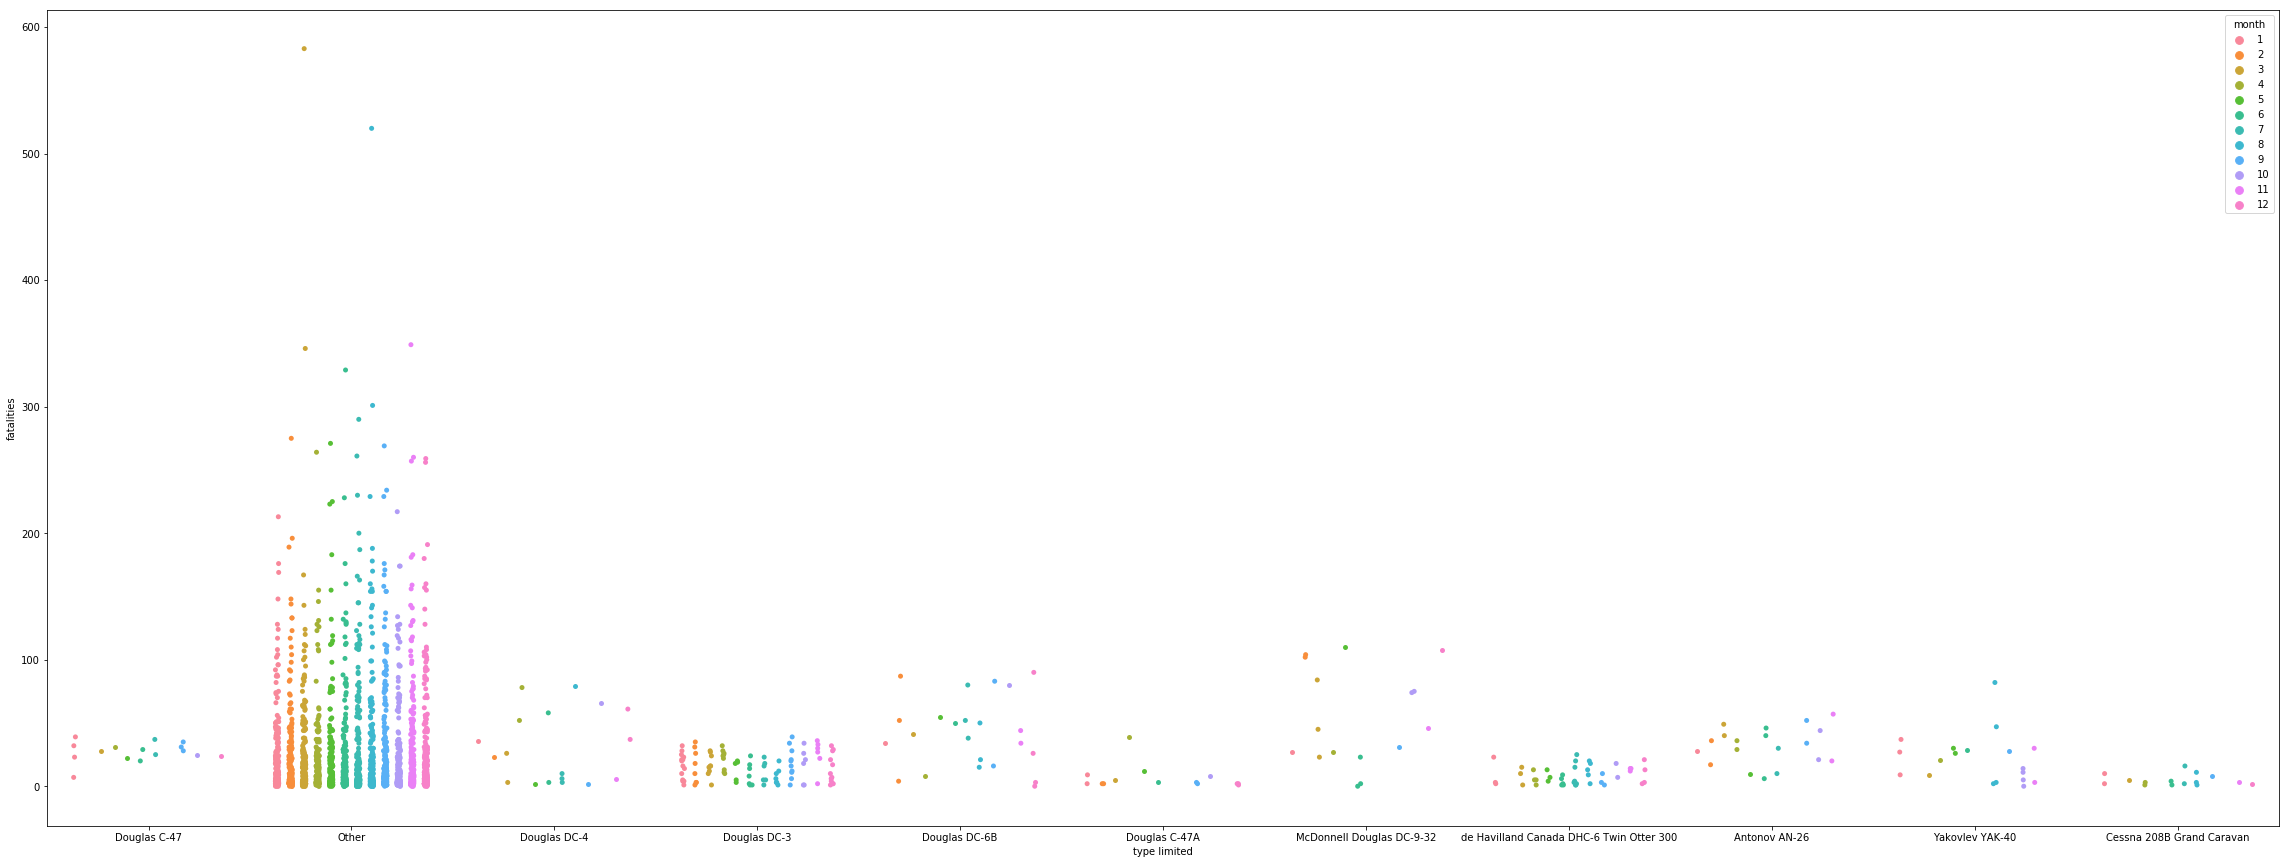

In [164]:
plt.figure(figsize=(40, 15))
sns.stripplot(x ="type limited", y = "fatalities", hue = "month", dodge=True, jitter=True, data = df)
plt.show()
#pro: does not overlap sencond category plots
#con: colorful default but colors makes it hard to see

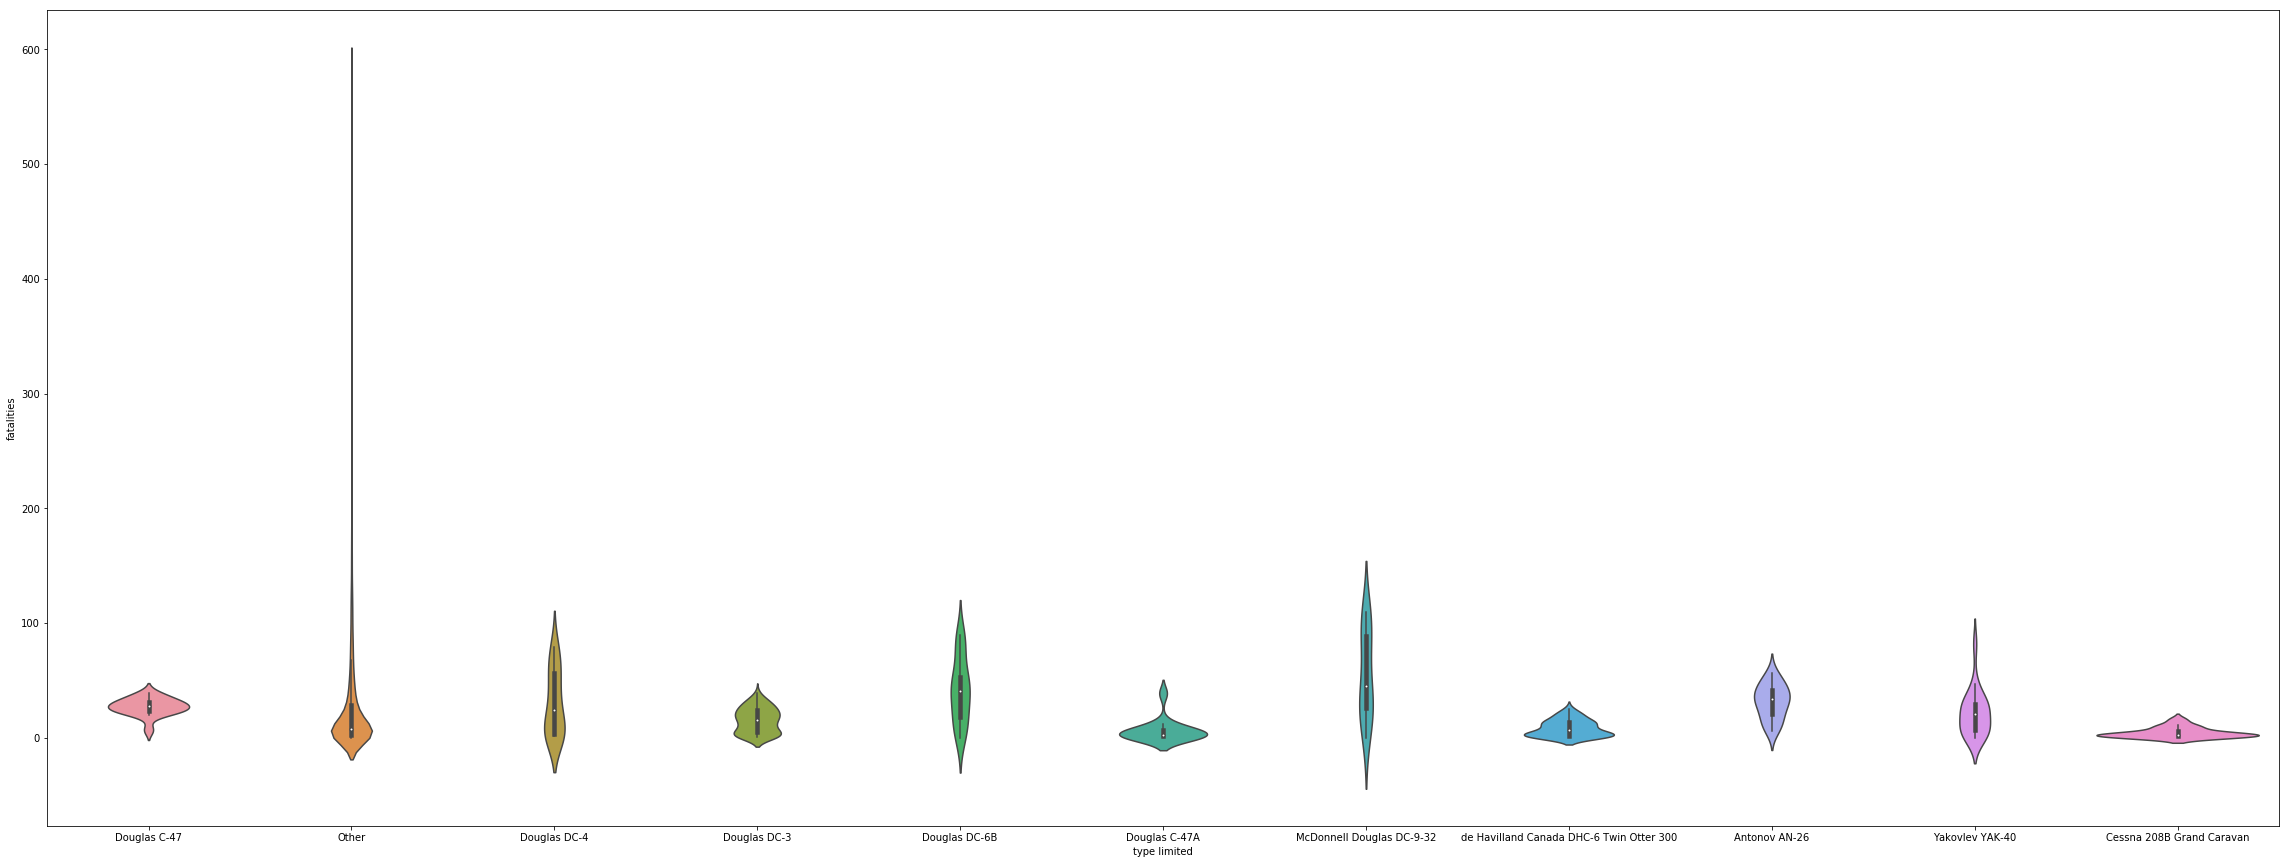

In [160]:
plt.figure(figsize=(40, 15))
sns.violinplot(x="type limited", y="fatalities", data = df)
plt.show()
#pro: unique visualization
#con: large outliers make the graph streched out and harder to see 

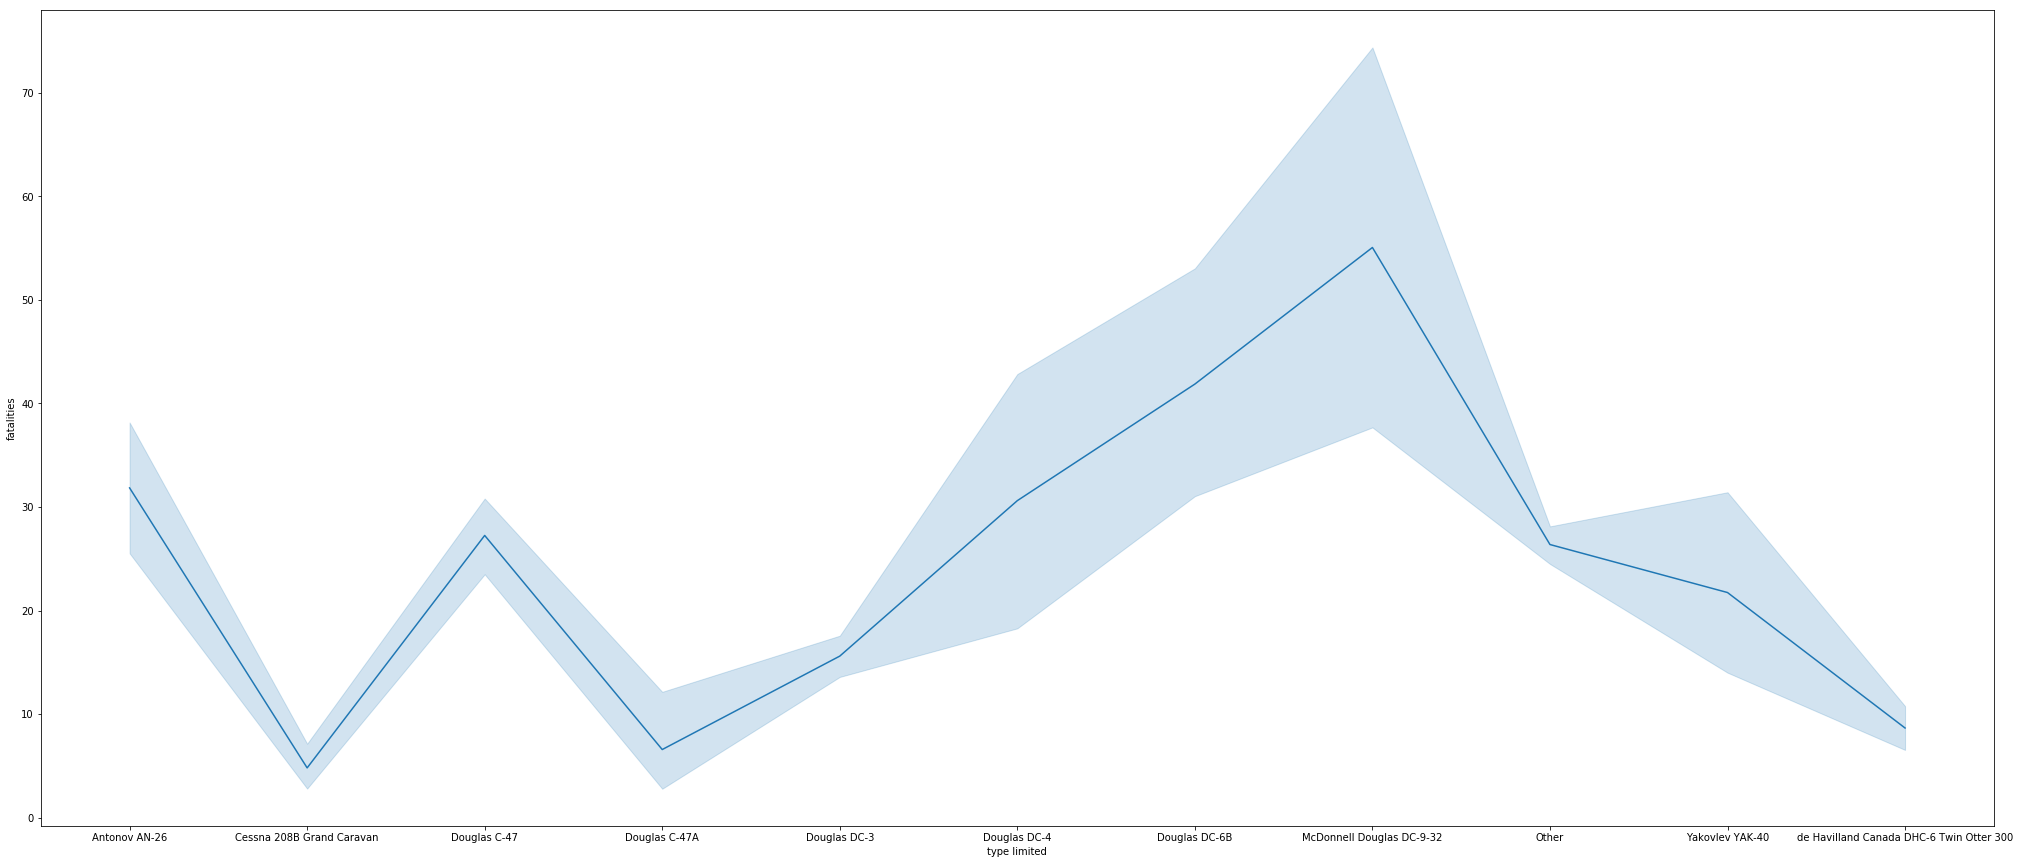

In [121]:
plt.figure(figsize=(35, 15))
sns.lineplot(x="type limited", y="fatalities", data = df)
plt.show()
#pro: shows error bands
#con: relation from one category to the next doesn't make much sense in this case

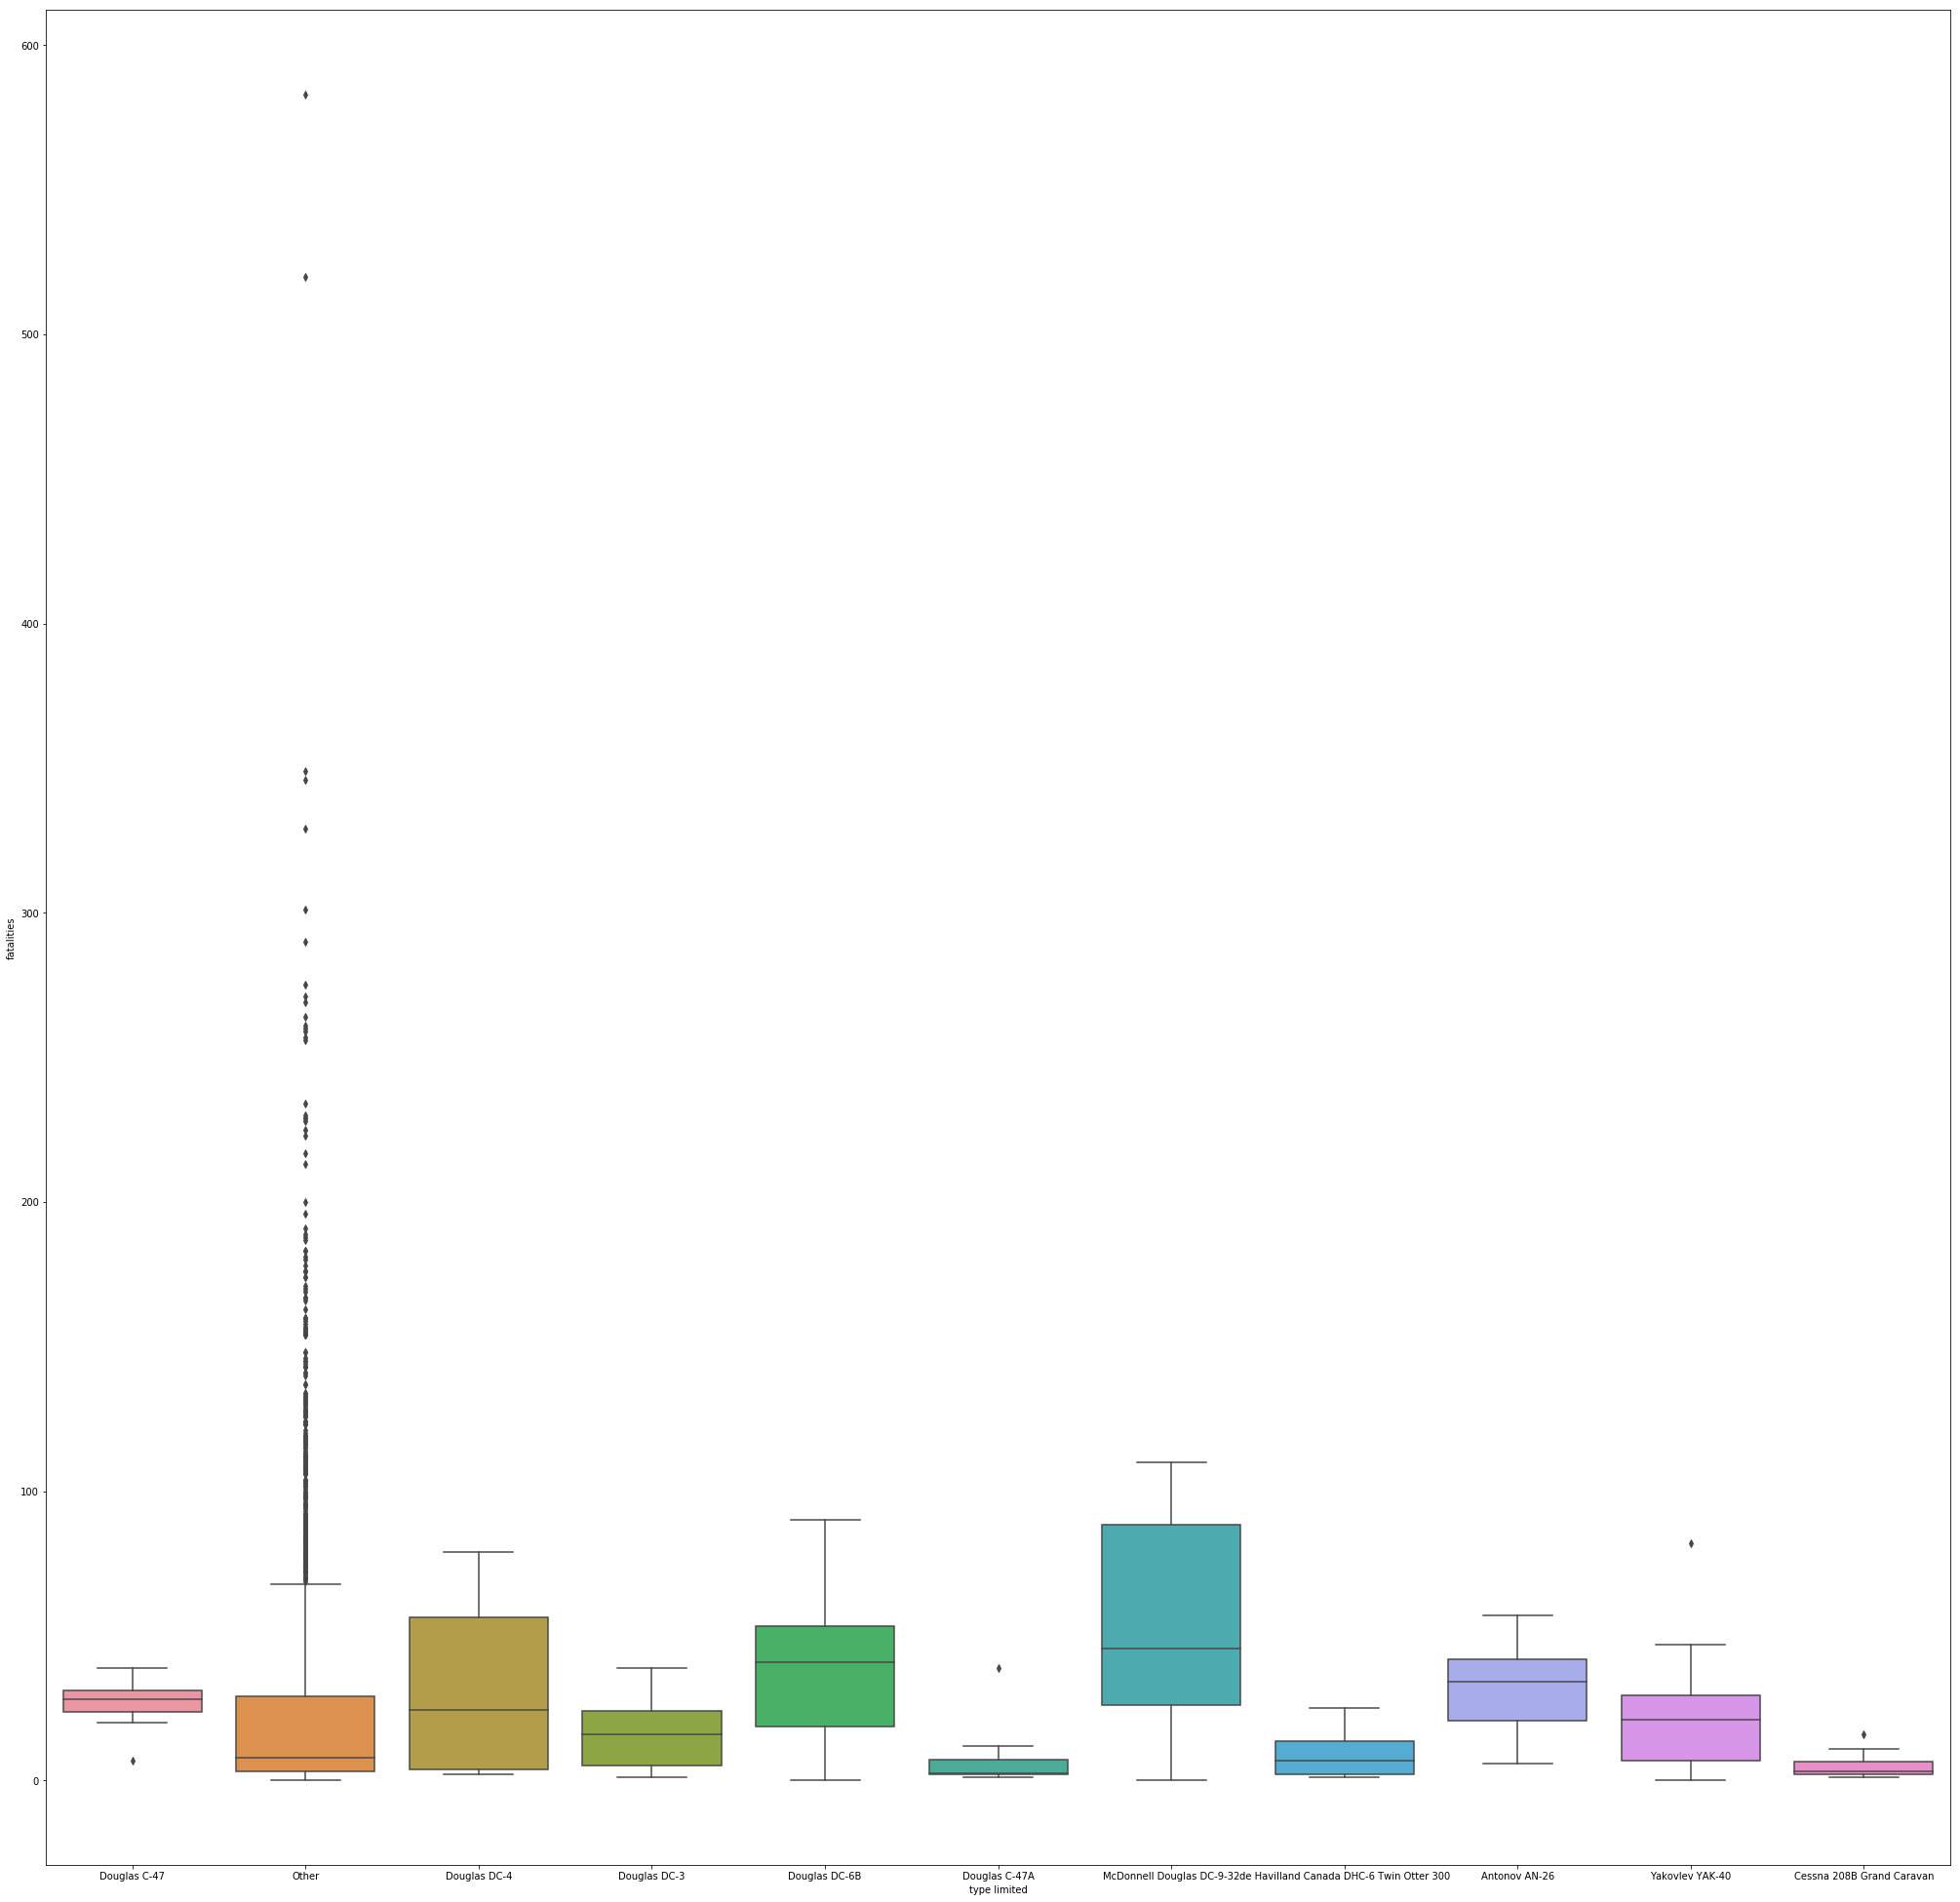

In [146]:
plt.figure(figsize=(35, 35))
sns.boxplot("type limited", "fatalities", data = df)
plt.show()
#pro: shows various statistics for each variable
#con: large outliers make the graph streched out and harder to see 